<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/First_Example_of_a_CNN_(CIFAR10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House number predictor


## Load the SVHN Dataset
Obtain the SVHN dataset from https://www.kaggle.com/datasets/sasha18/street-view-house-nos-h5-file/
Extract the .h5 file from inside the archive
Load the dataset using

In [39]:
import h5py
import numpy as np
with h5py.File('SVHN_single_grey1.h5', 'r') as file:
  x_train = np.array(file['X_train'])
  y_train = np.array(file['y_train'])
  x_test = np.array(file['X_test'])
  y_test = np.array(file['y_test'])
  x_val = np.array(file['X_val'])
  y_val = np.array(file['y_val'])


# Preprocess the Data
Explore and visualize a few images from the dataset.

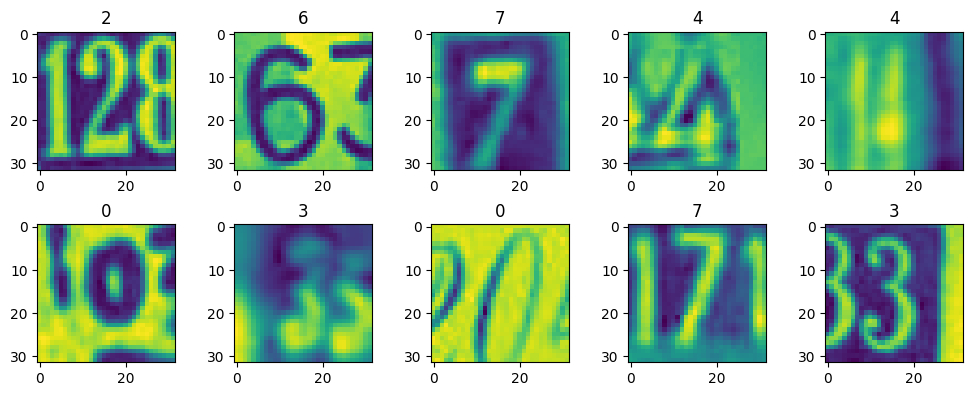

Training data shape :  (42000, 32, 32) (42000,)


In [40]:
# Render the first 10 images
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))  # Adjust as needed
for i in range(10):
    plt.subplot(2, 5, i+1)
    # Display image and label here
    plt.imshow(x_train[i])
    plt.title(y_train[i])
plt.tight_layout()
plt.show()


# Explore and visualize the dataset
print('Training data shape : ', x_train.shape, y_train.shape)

In [41]:
# Normalize the pixel values of the images to the range [0, 1].
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_val = x_val.astype('float32')/255

# Reshape the input to make it compatible to the CNN model
x_train = x_train.reshape(-1, 32, 32, 1)
x_test = x_test.reshape(-1, 32, 32, 1)
x_val = x_val.reshape(-1, 32, 32, 1)

from keras.utils import to_categorical

# Assuming y_train and y_test are your target data
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)

## Build a Convolutional Neural Network (CNN)

Create a CNN model suitable for image classification.
Design the architecture with convolutional layers, pooling layers, and dense layers.
Compile the model with an appropriate optimizer, loss function, and metric.

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import keras.backend as K
from keras.optimizers import Adam

# Clear any existing model from memory
K.clear_session()

# Define Model
model = Sequential([
  Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 1)),
  MaxPooling2D(pool_size=(2, 2)),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model.compile(
  optimizer=Adam(learning_rate=0.0005),
  loss='categorical_crossentropy',
  metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 10)                40970     
                                                                 
Total params: 41130 (160.66 KB)
Trainable params: 41130 (160.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the Model

Train the model on the SVHN training data.
Monitor the training process using validation data.
Aim for high accuracy and consider experimenting with hyperparameters.

In [43]:
# Train model
history = model.fit(
  x_train,
  y_train,
  batch_size=128,
  epochs=50,
  verbose=1, 
  validation_data=(x_val, y_val)
)

Epoch 1/50
329/329 [==============================] - 4s 10ms/step - loss: 2.2431 - accuracy: 0.2400 - val_loss: 2.1292 - val_accuracy: 0.4077
Epoch 2/50
329/329 [==============================] - 3s 9ms/step - loss: 1.9425 - accuracy: 0.4944 - val_loss: 1.7271 - val_accuracy: 0.5695
Epoch 3/50
329/329 [==============================] - 3s 9ms/step - loss: 1.5555 - accuracy: 0.6230 - val_loss: 1.4003 - val_accuracy: 0.6644
Epoch 4/50
329/329 [==============================] - 3s 9ms/step - loss: 1.3000 - accuracy: 0.6844 - val_loss: 1.2026 - val_accuracy: 0.7017
Epoch 5/50
329/329 [==============================] - 3s 9ms/step - loss: 1.1427 - accuracy: 0.7142 - val_loss: 1.0807 - val_accuracy: 0.7294
Epoch 6/50
329/329 [==============================] - 3s 9ms/step - loss: 1.0370 - accuracy: 0.7389 - val_loss: 0.9919 - val_accuracy: 0.7511
Epoch 7/50
329/329 [==============================] - 3s 9ms/step - loss: 0.9590 - accuracy: 0.7551 - val_loss: 0.9283 - val_accuracy: 0.7650
Epoch

## Evaluate the Model
Evaluate the trained model on the SVHN test data.
Analyze the classification performance and accuracy.

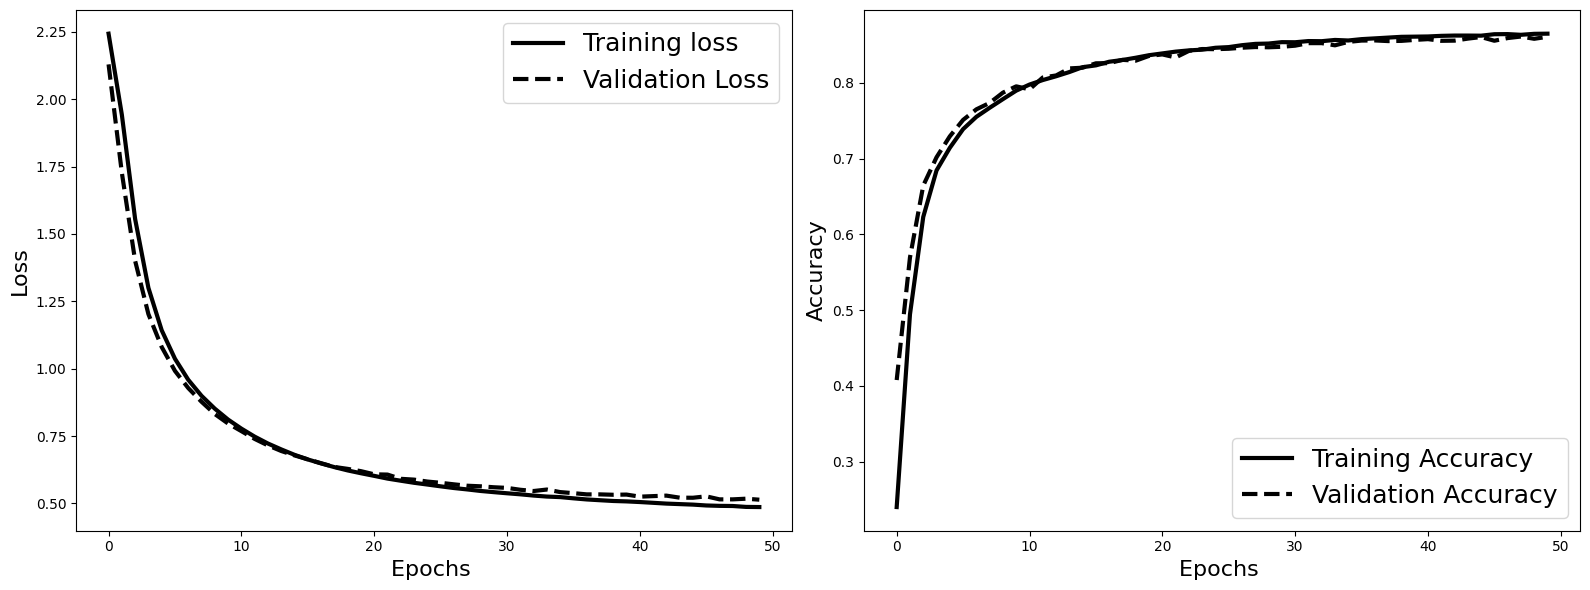

In [44]:
plt.figure(figsize=[16,6])

# Loss Curves
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)

# Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'],'black',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)

plt.tight_layout()
plt.show()

## Visualize Predictions

Choose a few images from the test set and visualize the model's predictions.
Explore cases where the model succeeded and where it might have struggled.

  1/563 [..............................] - ETA: 19s

563/563 [==============================] - 1s 1ms/step


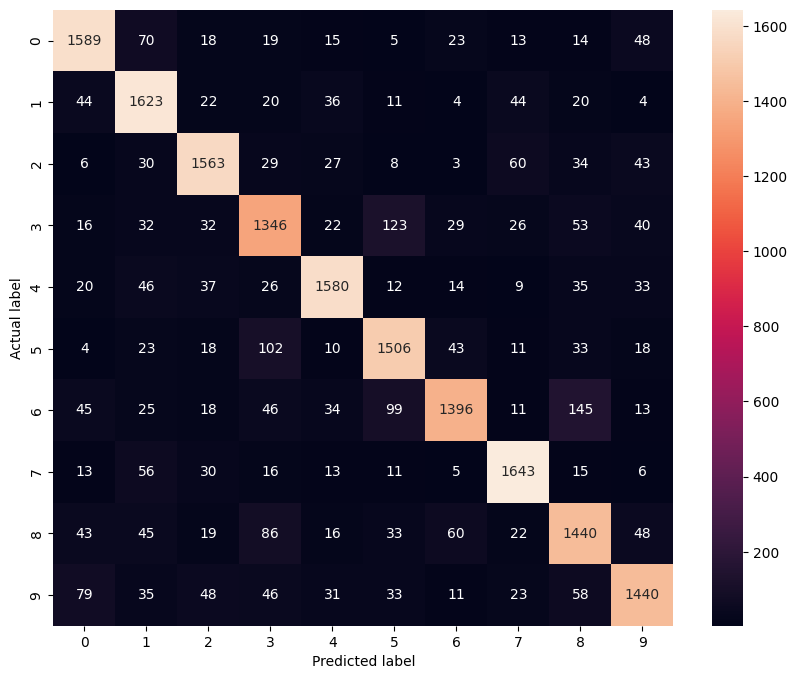

In [45]:
#Choose a few images from the test set  and visualize the model's predictions

# Create a confusion matrix to see where the model is getting confused
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='d')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Improve the model
- Start as simple as possible
- Increase learning rate
- Add more layers